In [5]:
## Importing the required python libraries 
import os, sys
import warnings
import timeit
import numpy as np
import pandas as pd 
import pkg_resources
import matplotlib.pyplot as plt
import re
import seaborn as sns


In [2]:
# Importing data 
def getting_pergene_data(datafile):
    with open(datafile) as f:
        lines = f.readlines()[1:] #skip header

    genenames_list = [None]*len(lines)
    tnpergene_list = [None]*len(lines)
    readpergene_list = [None]*len(lines) 

    line_counter = 0
    for line in lines:
        l = re.split(','' |\t', line.strip('\n'))

        genenames_list[line_counter] = l[0]
        tnpergene_list[line_counter] = int(l[1])
        readpergene_list[line_counter] = int(l[2])

        line_counter += 1

    return genenames_list,tnpergene_list,readpergene_list



In [73]:
folder="../data/"
bem3_a_datafile=folder+ "dbem3_a/bem3_a_pergene_tab.txt"
bem3_b_datafile=folder+"dbem3_b/bem3_b_pergene_tab.txt"
bem1bem3_a_datafile=folder+"dbem1dbem3_a/dbem1dbem3_a_tab_pergene.txt"
bem1bem3_b_datafile=folder+"dbem1dbem3_b/dbem1dbem3_b_tab_pergene.txt"
bem1_b_datafile=folder+"dbem1_b/dbem1_b_tab_pergene.txt"

bem3_gene,bem3_a_tn,bem3_a_reads=getting_pergene_data(bem3_a_datafile)
bem3_gene,bem3_b_tn,bem3_b_reads=getting_pergene_data(bem3_b_datafile)

bem1bem3_gene,bem1bem3_a_tn,bem1bem3_a_reads=getting_pergene_data(bem1bem3_a_datafile)
bem1bem3_gene,bem1bem3_b_tn,bem1bem3_b_reads=getting_pergene_data(bem1bem3_b_datafile)

bem1_gene,bem1_b_tn,bem1_b_reads=getting_pergene_data(bem1_b_datafile)

<ipython-input-65-cb0e97abb767>:15: RuntimeWarning: invalid value encountered in true_divide
  ax[2].scatter(np.divide(bem3_a_reads,bem3_a_tn),np.divide(bem3_b_reads,bem3_b_tn))


Text(0, 0.5, 'dbem3_b')

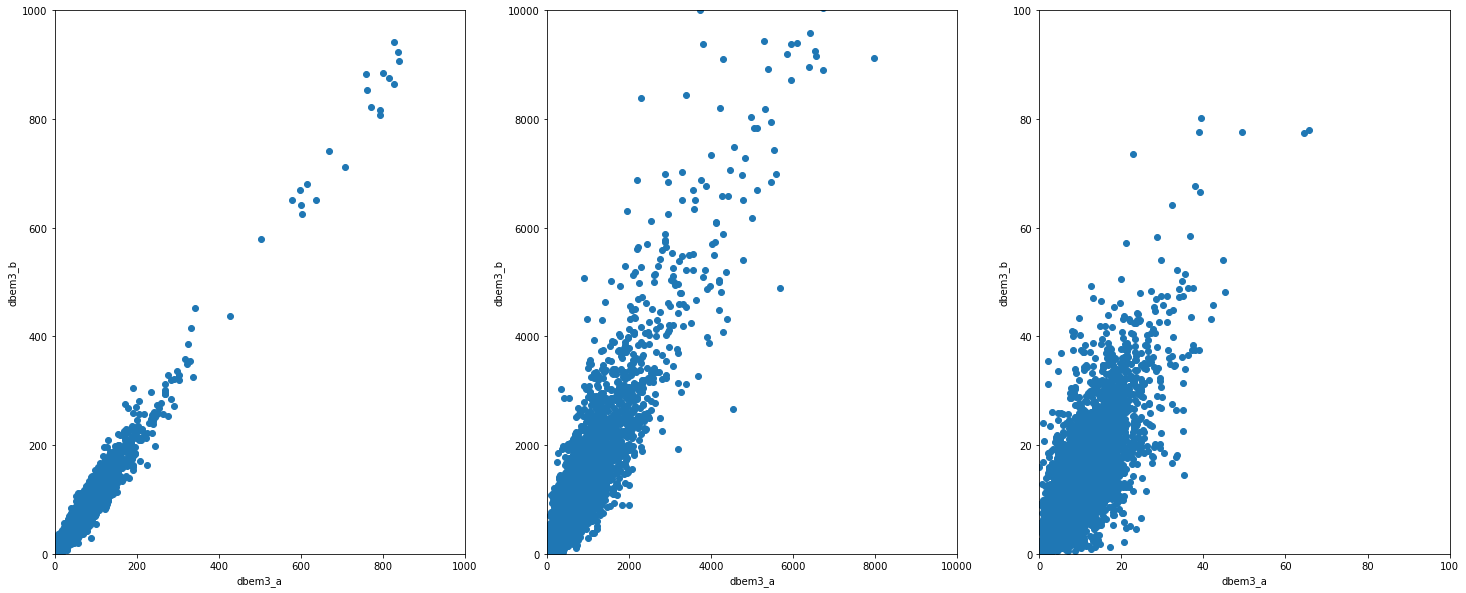

In [65]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(25,10))

ax[0].scatter(bem3_a_tn,bem3_b_tn)
ax[0].set_xlabel("dbem3_a")
ax[0].set_ylabel("dbem3_b")
ax[0].set_xlim(0,1000)
ax[0].set_ylim(0,1000)

ax[1].scatter(bem3_a_reads,bem3_b_reads)
ax[1].set_xlim(0,10000)
ax[1].set_ylim(0,10000)
ax[1].set_xlabel("dbem3_a")
ax[1].set_ylabel("dbem3_b")

ax[2].scatter(np.divide(bem3_a_reads,bem3_a_tn),np.divide(bem3_b_reads,bem3_b_tn))
ax[2].set_xlim(0,100)
ax[2].set_ylim(0,100)
ax[2].set_xlabel("dbem3_a")
ax[2].set_ylabel("dbem3_b")


<ipython-input-58-6ca2a27d9ac0>:15: RuntimeWarning: invalid value encountered in true_divide
  ax[2].scatter(np.divide(bem1bem3_a_reads,bem1bem3_a_tn),np.divide(bem1bem3_b_reads,bem1bem3_b_tn))


Text(0, 0.5, 'dbem3dbem3_b')

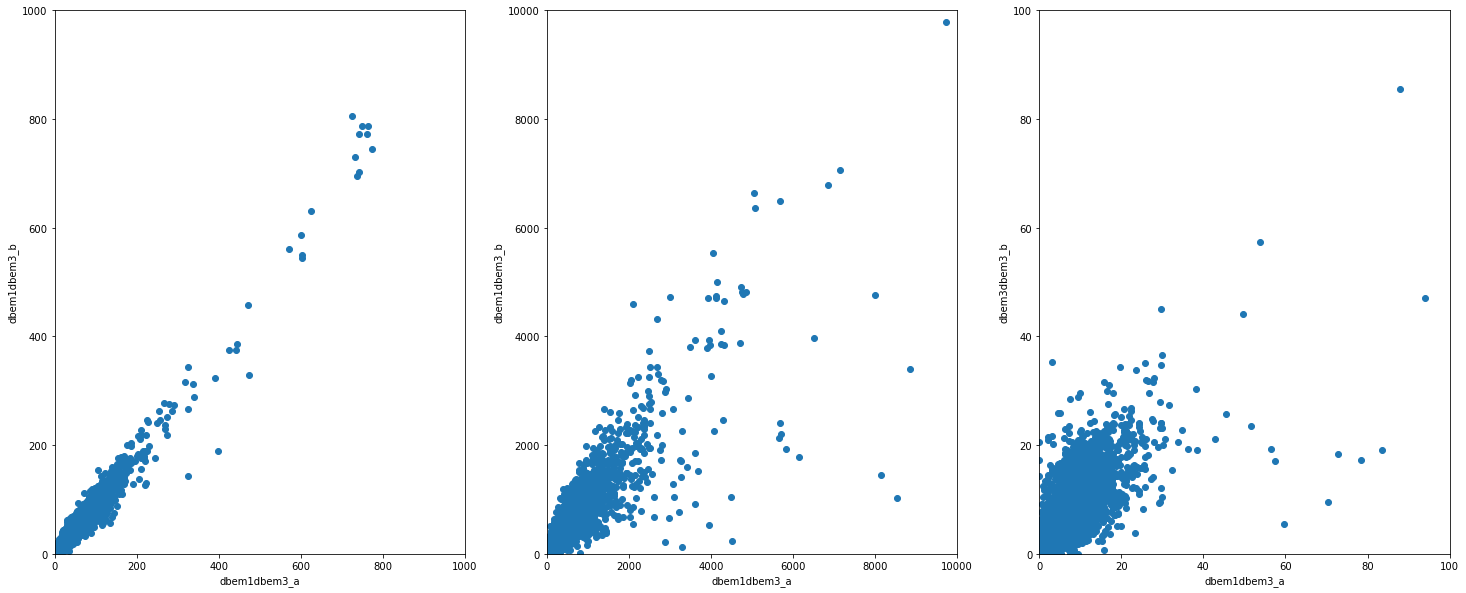

In [58]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(25,10))

ax[0].scatter(bem1bem3_a_tn,bem1bem3_b_tn)
ax[0].set_xlabel("dbem1dbem3_a")
ax[0].set_ylabel("dbem1dbem3_b")
ax[0].set_xlim(0,1000)
ax[0].set_ylim(0,1000)

ax[1].scatter(bem1bem3_a_reads,bem1bem3_b_reads)
ax[1].set_xlim(0,10000)
ax[1].set_ylim(0,10000)
ax[1].set_xlabel("dbem1dbem3_a")
ax[1].set_ylabel("dbem1dbem3_b")

ax[2].scatter(np.divide(bem1bem3_a_reads,bem1bem3_a_tn),np.divide(bem1bem3_b_reads,bem1bem3_b_tn))
ax[2].set_xlim(0,100)
ax[2].set_ylim(0,100)
ax[2].set_xlabel("dbem1dbem3_a")
ax[2].set_ylabel("dbem3dbem3_b")


In [59]:
def array2frame(arrays,index):
    df=pd.DataFrame(arrays)
    df=df.transpose()
    df.index=index
    df.columns=["transposons", "reads"]
    return df


In [74]:
bem3_a=[bem3_a_tn,bem3_a_reads]
bem3_b=[bem3_b_tn,bem3_b_reads]

bem1bem3_a=[bem1bem3_a_tn,bem1bem3_a_reads]
bem1bem3_b=[bem1bem3_b_tn,bem1bem3_b_reads]

bem1_b=[bem1_b_tn,bem1_b_reads]
index=bem3_gene

df_bem3_a=array2frame(bem3_a,bem3_gene)
df_bem3_b=array2frame(bem3_b,bem3_gene)

df_bem1bem3_a=array2frame(bem1bem3_a,bem3_gene)
df_bem1bem3_b=array2frame(bem1bem3_b,bem3_gene)

df_bem1_b=array2frame(bem1_b,bem3_gene)



In [61]:
df_bem3=pd.concat([df_bem3_a,df_bem3_b],keys=["a","b"])
df_bem1bem3=pd.concat([df_bem1bem3_a,df_bem1bem3_b],keys=["a","b"])

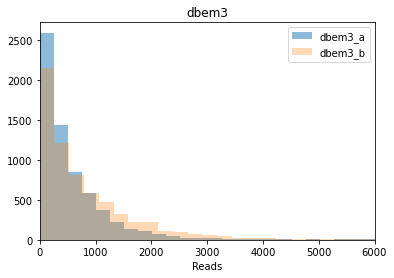

In [56]:
plt.hist(df_bem3.loc["a","reads"],bins=4000,alpha=0.5,label="dbem3_a")
plt.hist(df_bem3.loc["b","reads"],bins=4000,alpha=0.3,label="dbem3_b"); 
plt.xlim(0,6000)
plt.xlabel("Reads")
plt.title("dbem3")
plt.legend()

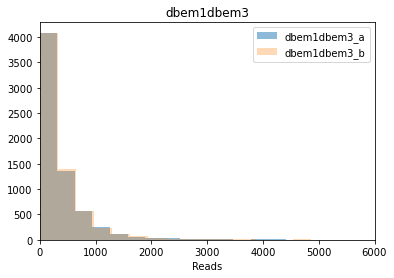

In [62]:
plt.hist(df_bem1bem3.loc["a","reads"],bins=4000,alpha=0.5,label="dbem1dbem3_a")
plt.hist(df_bem1bem3.loc["b","reads"],bins=4000,alpha=0.3,label="dbem1dbem3_b"); 
plt.xlim(0,6000)
plt.xlabel("Reads")
plt.title("dbem1dbem3")
plt.legend()

In [66]:

for j in df_bem3.index:
    
    if df_bem3.loc[j,"transposons"]>5:

        df_bem3.loc[j,"reads-per-tr"]=df_bem3.loc[j,"reads"]/(df_bem3.loc[j,"transposons"]-1)

    else :
        df_bem3.loc[j,"reads-per-tr"]=0

In [63]:
for j in df_bem1bem3.index:
    
    if df_bem1bem3.loc[j,"transposons"]>5:

        df_bem1bem3.loc[j,"reads-per-tr"]=df_bem1bem3.loc[j,"reads"]/(df_bem1bem3.loc[j,"transposons"]-1)

    else :
        df_bem1bem3.loc[j,"reads-per-tr"]=0

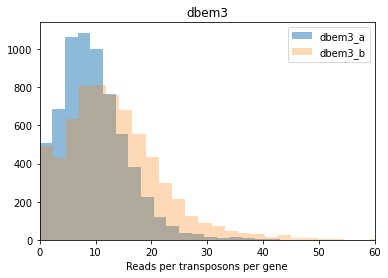

In [67]:
plt.hist(df_bem3.loc["a","reads-per-tr"],bins=200,alpha=0.5,label="dbem3_a")
plt.hist(df_bem3.loc["b","reads-per-tr"],bins=200,alpha=0.3,label="dbem3_b"); 
plt.xlim(0,60)
plt.xlabel("Reads per transposons per gene")
plt.title("dbem3")
plt.legend()

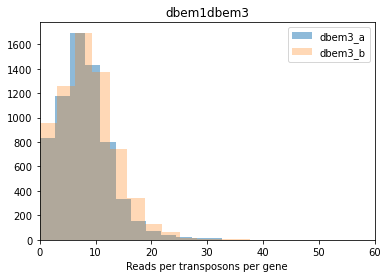

In [68]:
plt.hist(df_bem1bem3.loc["a","reads-per-tr"],bins=200,alpha=0.5,label="dbem3_a")
plt.hist(df_bem1bem3.loc["b","reads-per-tr"],bins=200,alpha=0.3,label="dbem3_b"); 
plt.xlim(0,60)
plt.xlabel("Reads per transposons per gene")
plt.title("dbem1dbem3")
plt.legend()

In [76]:
len(df_bem1bem3[(df_bem1bem3.loc[:, "transposons"]<5) & (df_bem1bem3.loc[:, "reads"]<10)])

765

In [77]:
len(df_bem3[(df_bem3.loc[:, "transposons"]<5)& (df_bem3.loc[:, "reads"]<10)])

368

In [78]:
len(df_bem1_b[(df_bem1_b.loc[:, "transposons"]<5)&(df_bem1_b.loc[:, "reads"]<10)])

801

In [1]:
from matplotlib_venn import venn2


data = {'cats': ['Furry','Claws','Low maintenance','Not scary','Cannot do tricks','Quiet'],
        'dogs': ['Furry','Claws','High maintenance','Sometimes scary','Can do tricks','Noisy']
       }
df = pd.DataFrame(data, columns = ['cats', 'dogs'])
venn2([set(df['cats'].to_list()), 
       set(df['dogs'].to_list())],
       set_labels=('Cats', 'Dogs')
     )

ModuleNotFoundError: No module named 'matplotlib_venn'